<a href="https://colab.research.google.com/github/codegitfirst/ML-workshop/blob/main/Copy_of_Lung_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn matplotlib seaborn numpy pandas

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

#suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
#import data
cancer_data = pd.read_csv('cl.csv')

In [ ]:
#look at formatting of entries
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#display null values and data types
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
cancer_data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
#numerical features
numerical = [
    'AGE'
]

#categorical features
categorical = [
    'GENDER',
    'SMOKING',
    'YELLOW_FINGERS',
    'ANXIETY',
    'PEER_PRESSURE',
    'CHRONIC DISEASE',
    'FATIGUE ',
    'ALLERGY ',
    'WHEEZING',
    'ALCOHOL CONSUMING',
    'COUGHING',
    'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY',
    'CHEST PAIN',
    'LUNG_CANCER'
]

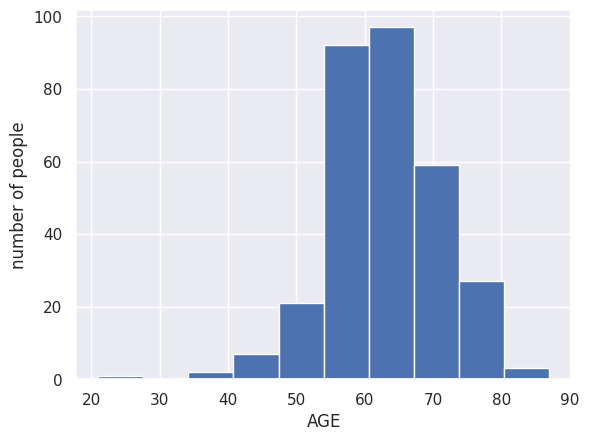

In [ ]:
#look at numerical data distribution
for i in cancer_data[numerical].columns:
    plt.hist(cancer_data[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

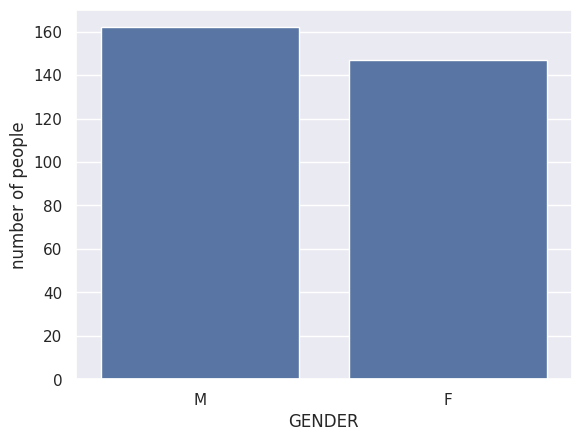

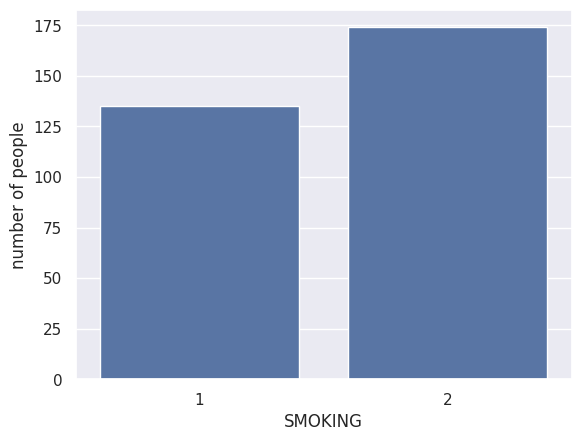

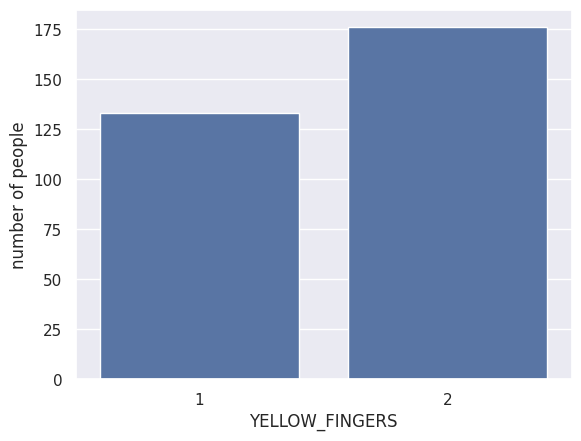

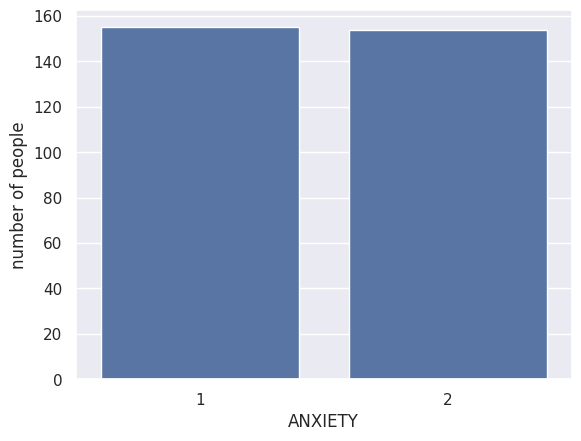

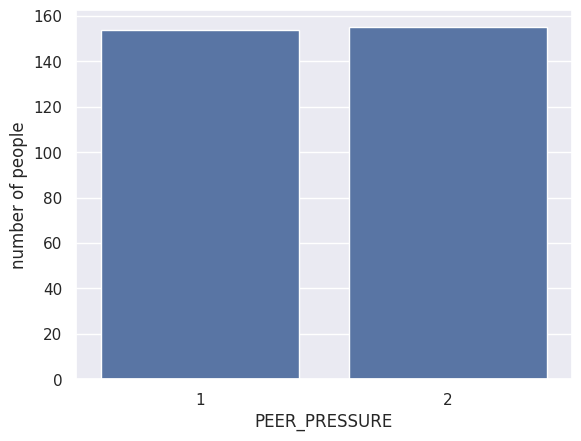

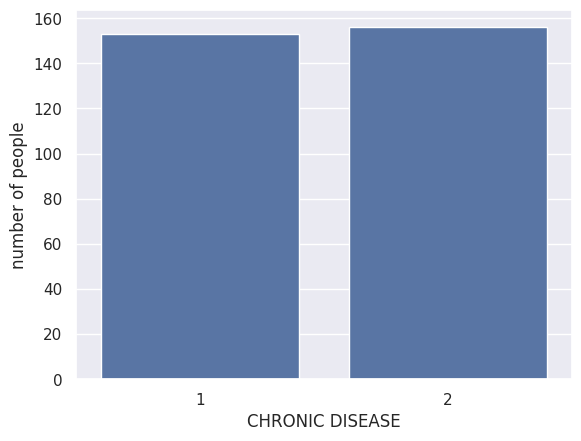

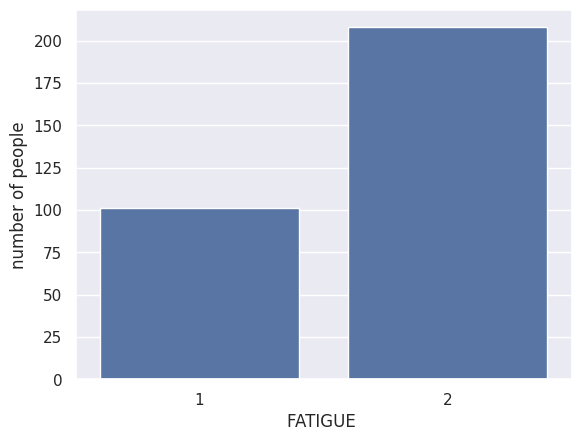

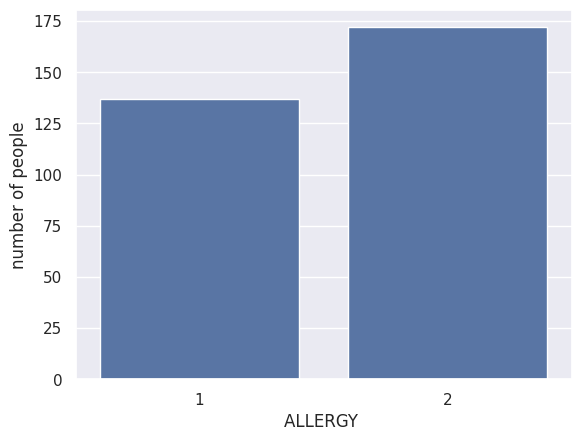

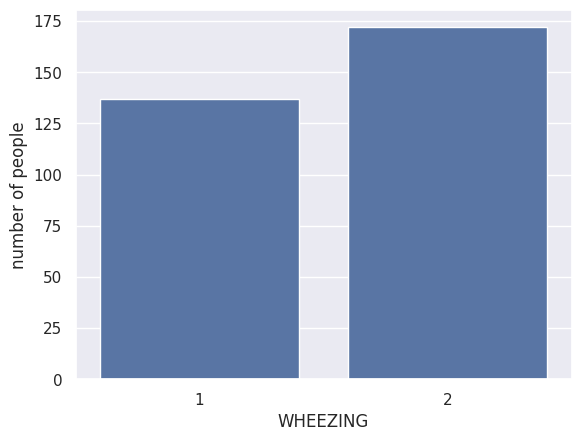

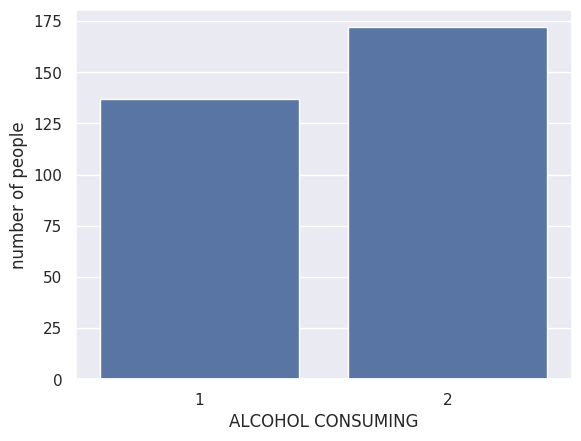

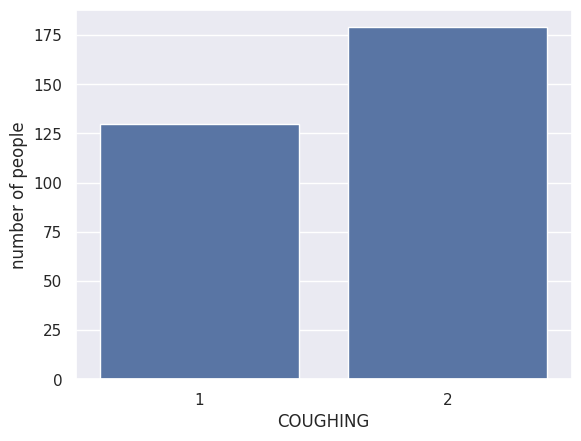

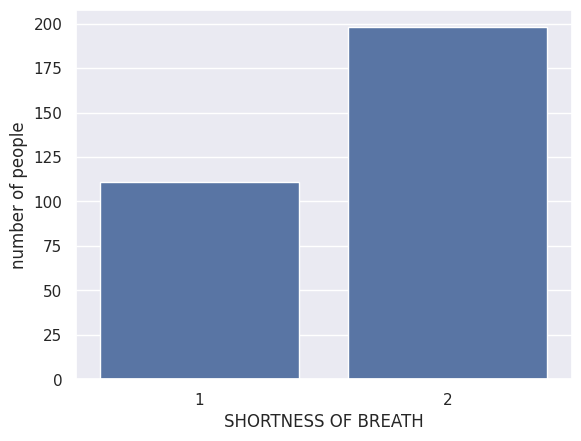

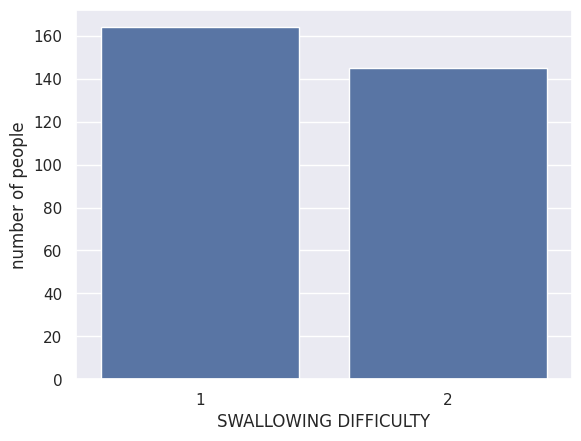

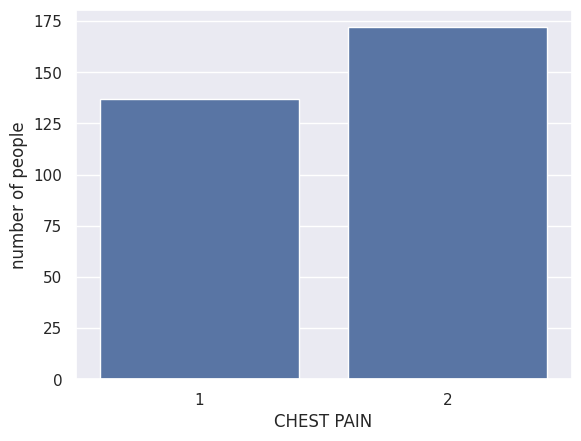

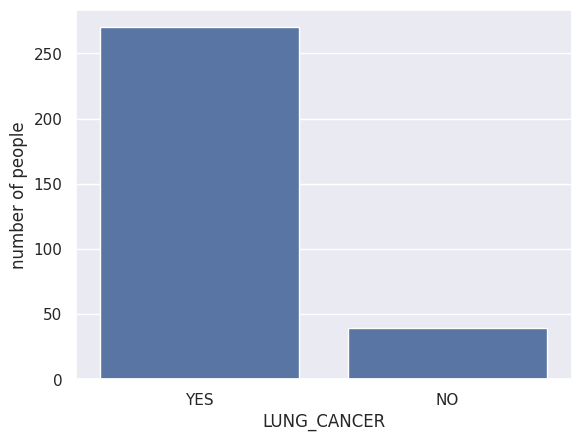

In [ ]:
#look at categorical data distribution
for i in cancer_data[categorical].columns:
    sns.barplot(x=cancer_data[categorical][i].value_counts().index,y=cancer_data[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

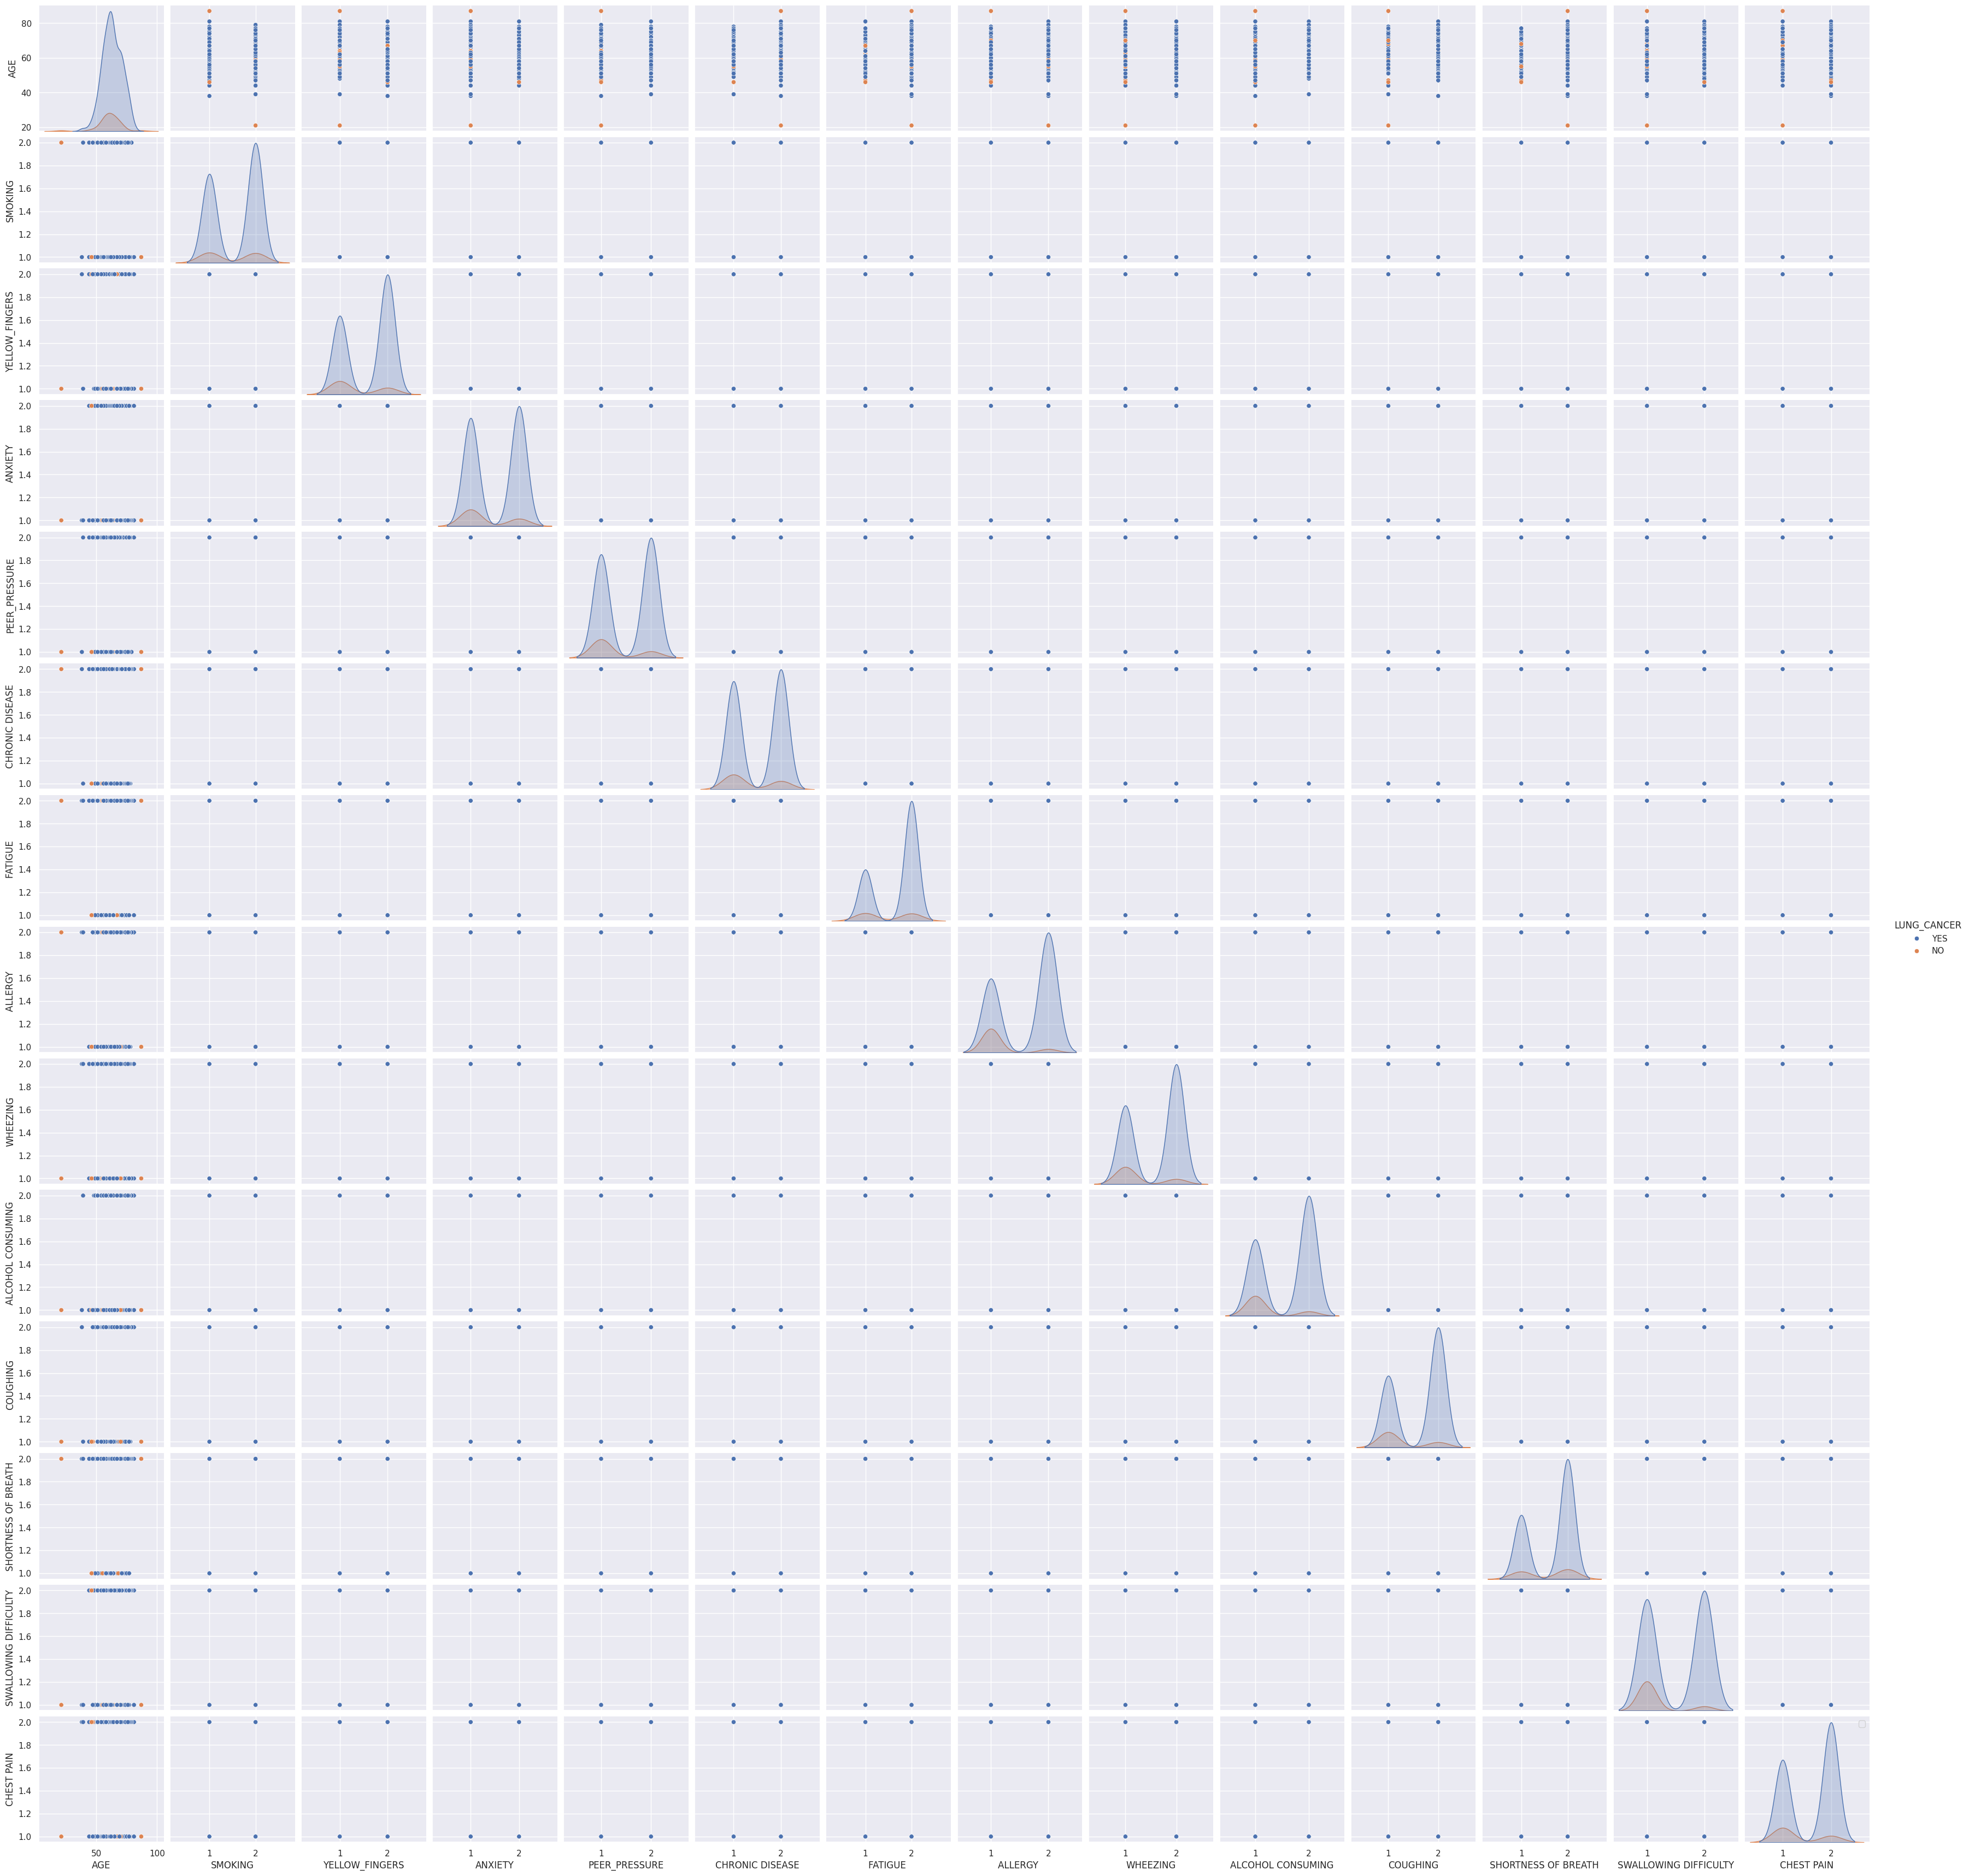

In [ ]:
#look at how target is distributed among variables
sns.pairplot(cancer_data,hue='LUNG_CANCER')
plt.legend()
plt.show()

In [ ]:
#remove target variable from categorical array
categorical.remove('LUNG_CANCER')

#change dtype of categorical features to object
cancer_data[categorical]=cancer_data[categorical].astype('object')

#copy of variables and target
X = cancer_data.copy()
y = X.pop('LUNG_CANCER')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHRONIC DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS OF BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST PAIN             309 non-null    object
dtypes: int64(1), object(14)

In [ ]:
X_mi = X.copy()

In [ ]:
#label encoding for categorical variables
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

X_mi['AGE']=X_mi['AGE'].astype('float64')

#all discrete features have int dtypes
discrete_features = X_mi.dtypes == int

In [ ]:
discrete_features

GENDER                    True
AGE                      False
SMOKING                   True
YELLOW_FINGERS            True
ANXIETY                   True
PEER_PRESSURE             True
CHRONIC DISEASE           True
FATIGUE                   True
ALLERGY                   True
WHEEZING                  True
ALCOHOL CONSUMING         True
COUGHING                  True
SHORTNESS OF BREATH       True
SWALLOWING DIFFICULTY     True
CHEST PAIN                True
dtype: bool

In [ ]:
#use classification since the target variable is discrete
from sklearn.feature_selection import mutual_info_classif

#define a function to produce mutual information scores
def make_mi_scores(X_mi, y, discrete_features):
    mi_scores = mutual_info_classif(X_mi, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#compute mutual information scores
mi_scores = make_mi_scores(X_mi, y, discrete_features)
mi_scores

ALLERGY                  0.057504
ALCOHOL CONSUMING        0.043414
SWALLOWING DIFFICULTY    0.037858
WHEEZING                 0.031806
COUGHING                 0.031021
CHEST PAIN               0.018221
PEER_PRESSURE            0.018029
YELLOW_FINGERS           0.016365
ANXIETY                  0.010750
FATIGUE                  0.010725
CHRONIC DISEASE          0.006217
AGE                      0.005667
GENDER                   0.002261
SHORTNESS OF BREATH      0.001804
SMOKING                  0.001680
Name: MI Scores, dtype: float64

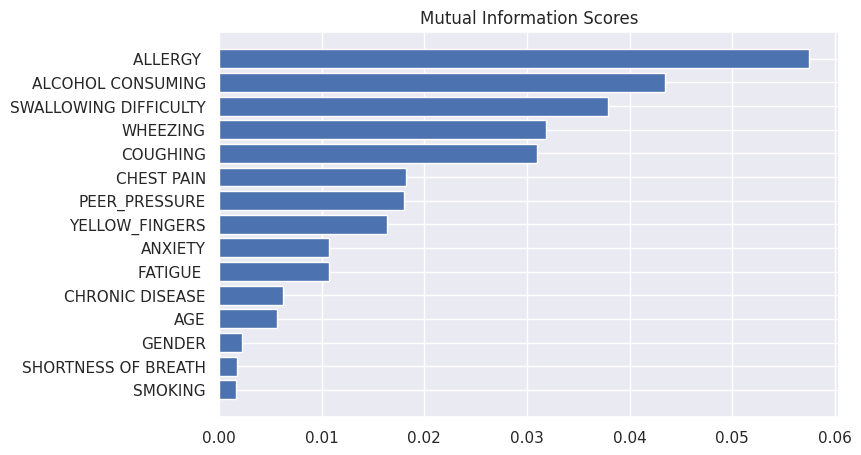

In [ ]:
#define a function to plot mutual information scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

#plot the scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#get feature names
X = pd.concat([X[numerical],pd.get_dummies(X[categorical])],axis=1)
feature_names = X.columns

# train/test split with stratify making sure classes are evenlly represented across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=1)

#define scaler
scaler=MinMaxScaler()

#apply preprocessing to split data with scaler
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#logistic regression with five-fold cross validation
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))

0.9308048103607771 +/- 0.0158848177577188


In [ ]:
#random forest classifier with five-fold cross validation
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))

0.9350601295097132 +/- 0.013760232121339587


In [ ]:
#support vector classifier with five-fold cross validation
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))

0.9351526364477335 +/- 0.023485469326540147


In [ ]:
#ml algorithm tuner
from sklearn.model_selection import GridSearchCV

#performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(classifier.best_score_),str(classifier.cv_results_['std_test_score'][classifier.best_index_])))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
#logistic regression performance tuner
lr = LogisticRegression()
param_grid = {'max_iter' : [15000],
              'C' : np.arange(.1,.6,.1)
             }
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Logistic Regression
Best Score: 0.9264569842738206 +/- 0.01712752904500742
Best Parameters: {'C': 0.30000000000000004, 'max_iter': 15000}


In [ ]:
#random forest performance tuner
rf = RandomForestClassifier(random_state = 1)
param_grid =  {
                'n_estimators': np.arange(8,20,2),
                'bootstrap': [True,False], #bagging (T) vs. pasting (F)
                'max_depth': [10],
                'max_features': ['auto','sqrt'],
#                 'min_samples_leaf': np.arange(2,6,1),
#                 'min_samples_split': np.arange(2,6,1)
              }
clf_rf_rnd = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Best Score: 0.9394079555966698 +/- 0.021250436398270147
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}


In [ ]:
#support vector classifier performance tuner
svc = SVC(probability = True, random_state = 1)
param_grid = {
              'kernel': ['linear', 'poly', 'sigmoid','rbf'],
              'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4],
              'C': np.arange(40,70,5)
             }
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'Support Vector Classifier')

Support Vector Classifier
Best Score: 0.9438482886216466 +/- 0.016747588503435138
Best Parameters: {'C': 50, 'gamma': 1, 'kernel': 'linear'}


In [40]:
!pip install --upgrade scipy # Upgrade scipy to the latest version
#import evaluation tools
from sklearn.metrics import accuracy_score,precision_score, matthews_corrcoef, confusion_matrix, classification_report
import scikitplot as skplt
from scipy.interpolate import interp # Import interp from the correct submodule

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.


ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
lr = LogisticRegression(C= 0.3, max_iter= 15000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

#assess accuracy
print('LogisticRegression test accuracy: {}'.format(accuracy_score(y_test, y_pred_lr)))

In [ ]:
lr_coefficients = pd.DataFrame([lr.coef_[0]], columns = feature_names)
sorted_lr = lr_coefficients.iloc[:, np.argsort(lr_coefficients.loc[0])]

plt.figure(figsize=(16,7))
sns.barplot(x=sorted_lr.columns, y=sorted_lr.iloc[0,:])
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('LogisticRegression Coefficients')
plt.show()

In [ ]:
#create and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_lr)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#plot as heatmap
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

#plot settings
class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [ ]:
print('LogisticRegression')
print(classification_report(y_test, y_pred_lr))

In [ ]:
#create support vector classifier model with tuned parameters
svc = SVC(probability = True, random_state = 1,C= 50, gamma = 1, kernel= 'linear')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#assess accuracy
print('SVC test accuracy: {}'.format(accuracy_score(y_test, y_pred_svc)))

In [ ]:
#create and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_svc)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#plot as heatmap
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, vmin=0, vmax=1)

#plot settings
class_names = ['Lung cancer', 'No lung cancer']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC')
plt.show()

In [ ]:
print('SVC')
print(classification_report(y_test, y_pred_svc))

In [ ]:
#plot ROC curve for best classifiers
from sklearn import metrics

pred_prob_lr = lr.predict_proba(X_test)
pred_prob_svc = svc.predict_proba(X_test)

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, pred_prob_lr[:,1],pos_label='YES')
fpr_svc, tpr_svc, thresholds_svc = metrics.roc_curve(y_test, pred_prob_svc[:,1],pos_label='YES')

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(fpr_lr, tpr_lr, label='LogisticRegression')
ax.plot(fpr_svc, tpr_svc, label='SVC')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifiers')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
#calculate AUC for classifiers
print('LogisticRegression AUC: {}'.format(metrics.auc(fpr_lr, tpr_lr)))
print('SVC AUC: {}'.format(metrics.auc(fpr_svc, tpr_svc)))

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
#determine feature weights
perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = list(feature_names), top=len(feature_names))

In [ ]:
import shap

In [ ]:
#create object that can calculate shap values
explainer = shap.KernelExplainer(svc.predict_proba, X_train)

pred_data = pd.DataFrame(X_test)

pred_data.columns = feature_names

data_for_prediction = pred_data

#calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.summary_plot(shap_values[1], data_for_prediction)